In [1]:
import pandas as pd

In [6]:
df_cuda = pd.read_csv("cuda_time.txt", sep=' ')
df_seq = pd.read_csv("seq_time.txt", sep=' ')
df_mp = pd.read_csv("mp_time.txt", sep=' ')
df_blocked = pd.read_csv("blocked_time.txt", sep=' ')

In [14]:
df_cuda_mean = df_cuda.groupby(by=df_cuda.v).sum() / df_cuda.groupby(by=df_cuda.v).count() / 1000.0
df_seq_mean = df_seq.groupby(by=df_seq.v).sum() / df_seq.groupby(by=df_seq.v).count() / 1000.0
df_mp_mean = df_mp.groupby(by=df_mp.v).sum() / df_mp.groupby(by=df_mp.v).count() / 1000.0
df_blocked_mean = df_blocked.groupby(by=df_blocked.v).sum() / df_blocked.groupby(by=df_blocked.v).count() / 1000.0


In [15]:
from matplotlib import pyplot
%pylab inline


Populating the interactive namespace from numpy and matplotlib


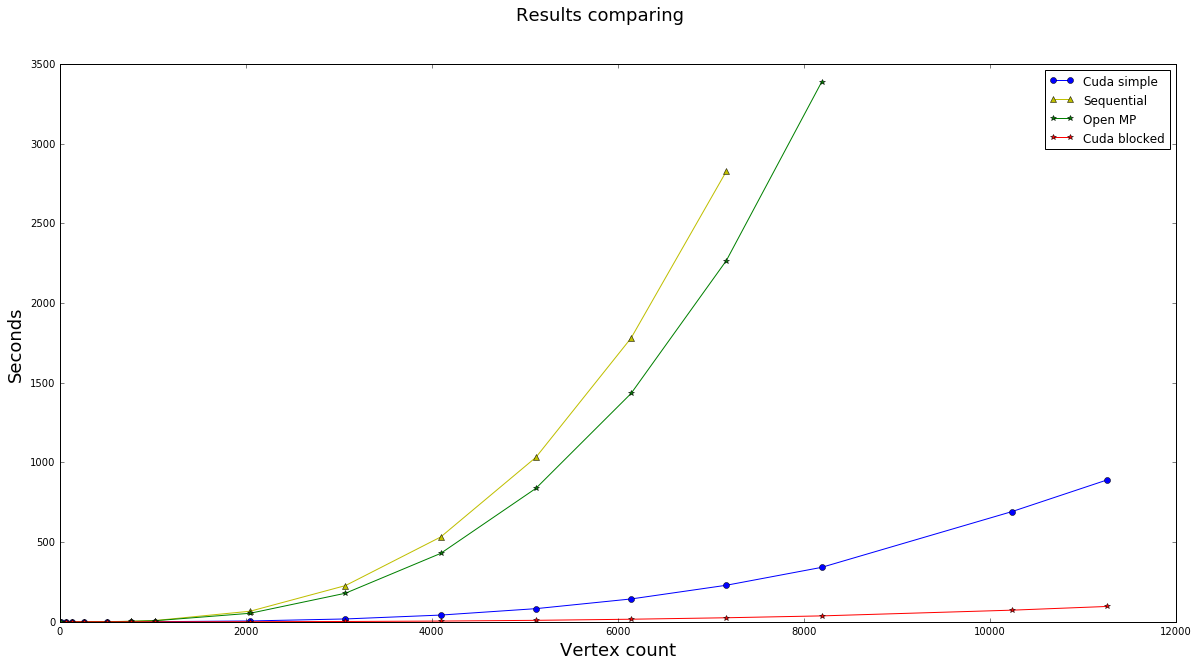

In [30]:
pyplot.figure(figsize=(20,10))
cuda_plot, = pyplot.plot(df_cuda_mean.index, df_cuda_mean.time, 'b-o', label="Cuda simple")
seq_plot, = pyplot.plot(df_seq_mean.index, df_seq_mean.time, 'y-^', label="Sequential")
mp_plot, = pyplot.plot(df_mp_mean.index, df_mp_mean.time, 'g-*', label="Open MP")
blocked_plot, = pyplot.plot(df_blocked_mean.index, df_blocked_mean.time, 'r-*', label="Cuda blocked")
pyplot.legend(handles=[cuda_plot, seq_plot, mp_plot, blocked_plot])
pyplot.suptitle("Results comparing", fontsize=18)
pyplot.ylabel("Seconds", fontsize=18)
pyplot.xlabel("Vertex count", fontsize=18)
pyplot.show()